# TD 4

[Use pytorch for all questions]

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import time

## Width vs Depth: Theory

### Function of interest

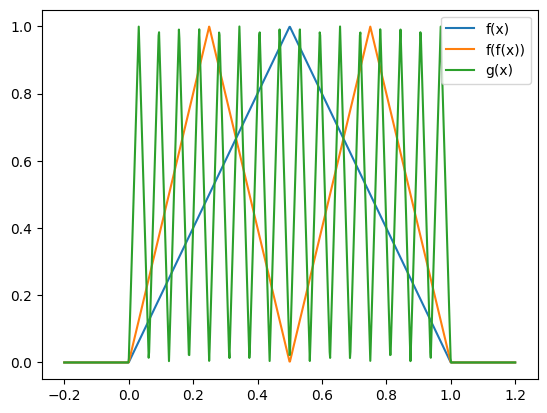

In [2]:
def f(x):
    return 1-(2*np.abs(x-0.5)).clip(0,1)

x = np.linspace(-0.2, 1.2, 1000)
y = f(x)
plt.plot(x, y, label="f(x)")
y = f(f(x))
plt.plot(x, y, label="f(f(x))")
# y = f(f(f(x)))
# plt.plot(x, y, label="f(f(f(x)))")

def g(x, lvl=5):
    for i in range(lvl):
        x = f(x)
    return x

y = g(x)
plt.plot(x, y, label="g(x)")
plt.legend()
plt.show()

Define a basic "rectange" network class (width is the same in all hidden layers);
leave the number of layers and number of neurons per layer as parameters, and use ReLU activation function.
The input and output are 1D, since we fit functions $\mathbb{R} \to \mathbb{r}$.

With 4 hidden layers and 5 neurons per layer, your network class should create a network as follows:

![rectangle network diagram](../images/rectangle_network.svg)

In [6]:
class Net(nn.Module):
    def __init__(self, n_layers=1, n_hidden=3):
        super(Net, self).__init__()
        self.fc_in = nn.Linear(1, n_hidden)
        self.fcs = []
        for i in range(n_layers-1):
            self.fcs.append(nn.Linear(n_hidden, n_hidden))
        self.fc_out = nn.Linear(n_hidden, 1)

    def forward(self, x):
        x = F.relu(self.fc_in(x))
        for i in range(len(self.fcs)):
            x = F.relu(self.fcs[i](x))
        x = self.fc_out(x)
        return x

Implement $f$ with a (basic) rectangle network with 1 hidden layer of 3 neurons.
Set the weights youself to fit exactly the function.

*Hint:*
$f(x) = 2x_+ -4(x-\frac{1}{2})_+ +2(x-1)_+$
$\qquad \qquad$ (where $\alpha_+$ is $ReLU(\alpha)$)

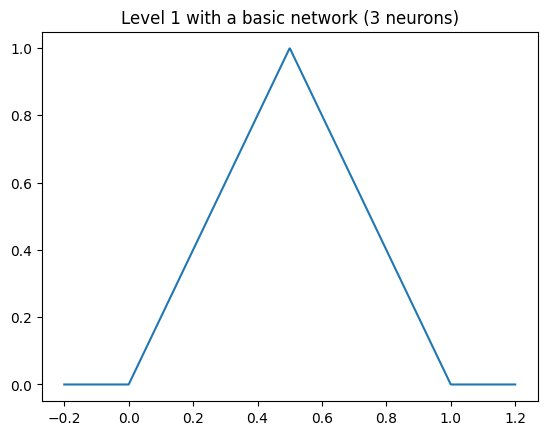

In [7]:
basic = Net(1, 3)
basic.fc_in.weight = torch.nn.Parameter(torch.tensor([[1.0], [1.0], [1.0]]))
basic.fc_in.bias = torch.nn.Parameter(torch.tensor([0.0, -0.5, -1.0]))
basic.fc_out.weight = torch.nn.Parameter(torch.tensor([[2.0, -4.0, 2.0]]))
basic.fc_out.bias = torch.nn.Parameter(torch.tensor([0.0]))

x = np.linspace(-0.2, 1.2, 1000)
y = basic(torch.tensor(x).float().view(-1, 1)).detach().numpy()
plt.plot(x, y, label="basic(x)")
plt.title(f'Level 1 with a basic network (3 neurons)')
plt.show()

Now, implement $g$ for `level = 4`, by increasing the width (and keeping a single hidden layer).
Use again a rectangle network.

*Hint: try to find the weight for `level = 2`, then `level = 3`, and deduce the pattern.*

Neurons used: 17


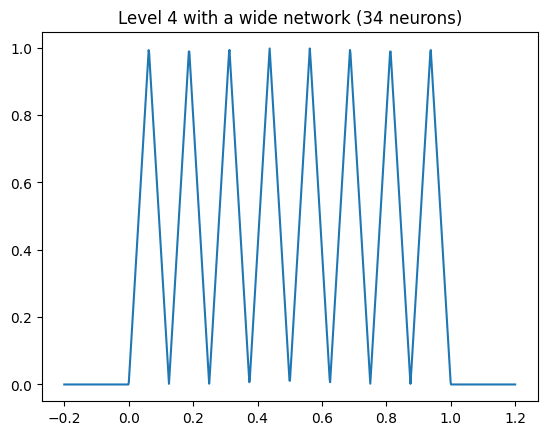

In [13]:
level = 4
d = 1
n = 2**level + 1
print(f'Neurons used: {n*d}')
wide = Net(d, n)

wide.fc_in.weight = torch.nn.Parameter(torch.tensor([[1.0]]*n))
wide.fc_in.bias = torch.nn.Parameter(-torch.arange(0, n)/(n-1))
wide.fc_out.weight = torch.nn.Parameter(torch.tensor([[1.0]+[-2.0, 2.0]*((n-3)//2)+[-2.0, 1.0]])*(n-1))
wide.fc_out.bias = torch.nn.Parameter(torch.tensor([0.0]))

x = np.linspace(-0.2, 1.2, 1000)
y = wide(torch.tensor(x).float().view(-1, 1)).detach().numpy()

plt.plot(x, y)
plt.title(f'Level {level} with a wide network ({n*(d+1)} neurons)')
plt.show()

Implementing $f$, then $g$ by increasing the width or the depth: